In [213]:
import pandas as pd
import os

In [214]:
file = os.path.join('df_SJdC_upstream_levels_wide.xlsx')
df = pd.read_excel(file, engine='openpyxl')

df.head()

,Unnamed: 0,Timestamp,01EVAPMPC_SEL,01FC466-02.PV,01LI211-01.PV,01LI231-01.PV,01LI238-03.PV,01LI239-01.PV,01LI415-02.PV,01DI460-10,01FC238-06.PV,01XV238-15.SP
0,0,2021-01-08 00:00:00,MANUAL,21466.728516,75.761887,18.739510,98.123650,25.528093,46.205421,1.007702,195.448975,TRANSFERIR
1,1,2021-01-08 00:00:10,MANUAL,21423.025391,75.793427,17.460096,98.143860,25.528730,46.818760,1.007675,194.670212,TRANSFERIR
2,2,2021-01-08 00:00:20,MANUAL,21431.402344,75.893127,16.559072,98.159607,25.519285,47.151310,1.007696,194.167191,TRANSFERIR
3,3,2021-01-08 00:00:30,MANUAL,21425.677734,76.189697,15.946632,98.133148,25.519285,47.794540,1.007692,193.898056,TRANSFERIR
4,4,2021-01-08 00:00:40,MANUAL,21430.080078,75.697983,15.155387,98.123276,25.568626,48.225708,1.007666,193.226974,TRANSFERIR


In [215]:
df.drop('01EVAPMPC_SEL', axis=1, inplace=True)

df.rename(columns={    
    '01FC466-02.PV': 'steam_flow_kg_per_hr',
    '01LI211-01.PV': 'tech_ll',
    '01LI231-01.PV': 'fft_ll',
    '01LI238-03.PV': 'tech_fltr_ll',
    '01LI239-01.PV': 'rct_ll',
    '01LI415-02.PV': 'eft_ll'
    }, inplace=True)

df['01XV238-15.SP'] = df['01XV238-15.SP'] == 'TRANSFERIR'
df['eft_feedrate'] = df['01XV238-15.SP'] * df['01DI460-10'] * df['01FC238-06.PV'] * 1000
df

,Unnamed: 0,Timestamp,steam_flow_kg_per_hr,tech_ll,fft_ll,tech_fltr_ll,rct_ll,eft_ll,01DI460-10,01FC238-06.PV,01XV238-15.SP,eft_feedrate
0,0,2021-01-08 00:00:00,21466.728516,75.761887,18.739510,98.123650,25.528093,46.205421,1.007702,195.448975,True,196954.344542
1,1,2021-01-08 00:00:10,21423.025391,75.793427,17.460096,98.143860,25.528730,46.818760,1.007675,194.670212,True,196164.292525
2,2,2021-01-08 00:00:20,21431.402344,75.893127,16.559072,98.159607,25.519285,47.151310,1.007696,194.167191,True,195661.461269
3,3,2021-01-08 00:00:30,21425.677734,76.189697,15.946632,98.133148,25.519285,47.794540,1.007692,193.898056,True,195389.469657
4,4,2021-01-08 00:00:40,21430.080078,75.697983,15.155387,98.123276,25.568626,48.225708,1.007666,193.226974,True,194708.227859
...,...,...,...,...,...,...,...,...,...,...,...,...
570236,570236,2021-03-14 23:59:20,5658.152344,-1.227728,-0.609406,0.011887,82.913078,29.163980,0.993599,-0.447890,False,-0.000000
570237,570237,2021-03-14 23:59:30,5657.651367,-1.239925,-0.607623,0.000647,82.870354,29.134054,0.993623,-0.493297,False,-0.000000
570238,570238,2021-03-14 23:59:40,5648.971191,-1.234947,-0.607022,0.000098,82.931862,29.082634,0.993628,-0.430557,False,-0.000000
570239,570239,2021-03-14 23:59:50,5637.811035,-1.231995,-0.607022,0.005129,82.863953,29.099367,0.993725,-0.460983,False,-0.000000


In [216]:
columns = [
#     'steam_flow_kg_per_hr',
    'tech_ll',
    'fft_ll',
    'tech_fltr_ll',
    'rct_ll',
    'eft_ll']
columns

['tech_ll', 'fft_ll', 'tech_fltr_ll', 'rct_ll', 'eft_ll']

In [217]:
df.dtypes

Unnamed: 0                       int64
Timestamp               datetime64[ns]
steam_flow_kg_per_hr           float64
tech_ll                        float64
fft_ll                         float64
tech_fltr_ll                   float64
rct_ll                         float64
eft_ll                         float64
01DI460-10                     float64
01FC238-06.PV                  float64
01XV238-15.SP                     bool
eft_feedrate                   float64
dtype: object

In [218]:
volume = {
     'tech_ll': 17000,
     'fft_ll': 15000,
     'tech_fltr_ll': 2437,
     'rct_ll': 7600,
     'eft_ll': 22000}

In [219]:
for vessel in columns:
    new_column = vessel+'_vol'
    df[new_column] = df[vessel] / 100 * volume[vessel]

In [220]:
df['total_vol'] = df['tech_ll_vol'] \
                + df['fft_ll_vol'] \
                + df['tech_fltr_ll_vol'] \
                + df['rct_ll_vol'] \
#                 + df['eft_ll_vol']

In [221]:
df

,Unnamed: 0,Timestamp,steam_flow_kg_per_hr,tech_ll,fft_ll,tech_fltr_ll,rct_ll,eft_ll,01DI460-10,01FC238-06.PV,01XV238-15.SP,eft_feedrate,tech_ll_vol,fft_ll_vol,tech_fltr_ll_vol,rct_ll_vol,eft_ll_vol,total_vol
0,0,2021-01-08 00:00:00,21466.728516,75.761887,18.739510,98.123650,25.528093,46.205421,1.007702,195.448975,True,196954.344542,12879.520721,2810.926437,2391.273341,1940.135094,10165.192719,20021.855593
1,1,2021-01-08 00:00:10,21423.025391,75.793427,17.460096,98.143860,25.528730,46.818760,1.007675,194.670212,True,196164.292525,12884.882507,2619.014454,2391.765865,1940.183510,10300.127182,19835.846336
2,2,2021-01-08 00:00:20,21431.402344,75.893127,16.559072,98.159607,25.519285,47.151310,1.007696,194.167191,True,195661.461269,12901.831665,2483.860874,2392.149621,1939.465675,10373.288193,19717.307836
3,3,2021-01-08 00:00:30,21425.677734,76.189697,15.946632,98.133148,25.519285,47.794540,1.007692,193.898056,True,195389.469657,12952.248535,2391.994858,2391.504821,1939.465675,10514.798889,19675.213890
4,4,2021-01-08 00:00:40,21430.080078,75.697983,15.155387,98.123276,25.568626,48.225708,1.007666,193.226974,True,194708.227859,12868.657074,2273.308039,2391.264230,1943.215607,10609.655762,19476.444950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570236,570236,2021-03-14 23:59:20,5658.152344,-1.227728,-0.609406,0.011887,82.913078,29.163980,0.993599,-0.447890,False,-0.000000,-208.713762,-91.410935,0.289678,6301.393951,6416.075706,6001.558933
570237,570237,2021-03-14 23:59:30,5657.651367,-1.239925,-0.607623,0.000647,82.870354,29.134054,0.993623,-0.493297,False,-0.000000,-210.787194,-91.143492,0.015761,6298.146881,6409.491920,5996.231957
570238,570238,2021-03-14 23:59:40,5648.971191,-1.234947,-0.607022,0.000098,82.931862,29.082634,0.993628,-0.430557,False,-0.000000,-209.940964,-91.053298,0.002380,6302.821503,6398.179474,6001.829620
570239,570239,2021-03-14 23:59:50,5637.811035,-1.231995,-0.607022,0.005129,82.863953,29.099367,0.993725,-0.460983,False,-0.000000,-209.439087,-91.053298,0.125003,6297.660400,6401.860771,5997.293019


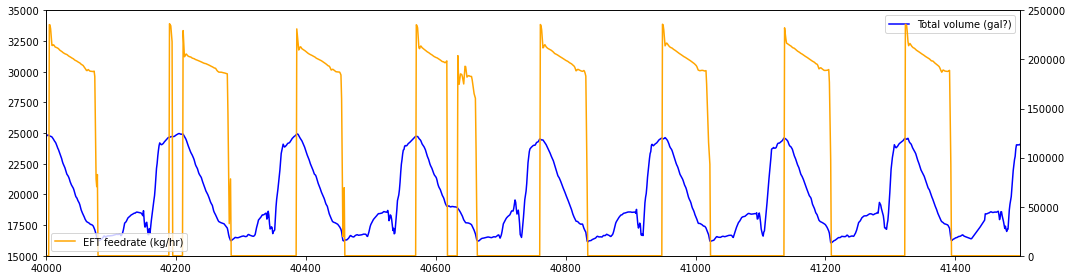

In [265]:
import matplotlib.pyplot as plt

start_point = 40000
end_point = start_point + 1500

f, ax1 = plt.subplots(figsize=(15,4))

ax1.plot(df['total_vol'], label='Total volume (gal?)', color='blue')
ax1.set_xlim([start_point, end_point])
ax1.set_ylim([15000, 35000])
ax2 = ax1.twinx()
ax2.plot(df['eft_feedrate'], label='EFT feedrate (kg/hr)', color='orange')
ax1.legend(loc='best')
ax2.legend(loc='lower left')
ax2.set_ylim([0, 250000])


f.tight_layout()
f.show()

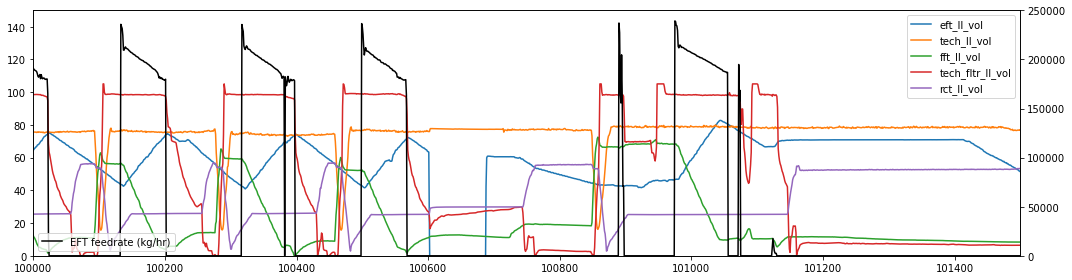

In [270]:
import matplotlib.pyplot as plt

start_point = 100000
end_point = start_point + 1500

f, ax1 = plt.subplots(figsize=(15,4))

ax1.plot(df['eft_ll'], label='eft_ll_vol') #, color='blue')
ax1.plot(df['tech_ll'], label='tech_ll_vol') #, color='blue')
ax1.plot(df['fft_ll'], label='fft_ll_vol') #, color='blue')
ax1.plot(df['tech_fltr_ll'], label='tech_fltr_ll_vol') #, color='blue')
ax1.plot(df['rct_ll'], label='rct_ll_vol') #, color='blue')
ax1.set_xlim([start_point, end_point])
ax1.set_ylim([0, 150])
ax2 = ax1.twinx()
ax2.plot(df['eft_feedrate'], label='EFT feedrate (kg/hr)', color='black')
ax1.legend(loc='best')
ax2.legend(loc='lower left')
ax2.set_ylim([0, 250000])


f.tight_layout()
f.show()

In [230]:
t = df['Timestamp']
t

0        2021-01-08 00:00:00
1        2021-01-08 00:00:10
2        2021-01-08 00:00:20
3        2021-01-08 00:00:30
4        2021-01-08 00:00:40
                 ...        
570236   2021-03-14 23:59:20
570237   2021-03-14 23:59:30
570238   2021-03-14 23:59:40
570239   2021-03-14 23:59:50
570240   2021-03-15 00:00:00
Name: Timestamp, Length: 570241, dtype: datetime64[ns]

In [231]:
total_vol = df['total_vol']
total_vol

0         20021.855593
1         19835.846336
2         19717.307836
3         19675.213890
4         19476.444950
              ...     
570236     6001.558933
570237     5996.231957
570238     6001.829620
570239     5997.293019
570240     5993.478325
Name: total_vol, Length: 570241, dtype: float64

<AxesSubplot:>

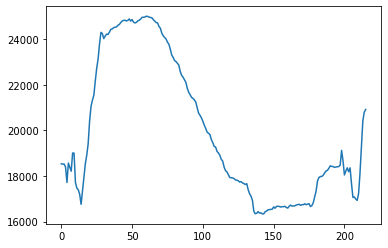

In [236]:
starting_point = 106
n_points = 216
example_section = total_vol[starting_point:starting_point+n_points]
example_section.reset_index(drop=True, inplace=True)
example_section.plot()

In [237]:
import numpy as np

mse_list = []

for i in range(len(total_vol) - n_points):
    
    start_point = i
    end_point = start_point + n_points
    compared_section = total_vol[start_point:end_point]
    compared_section.reset_index(drop=True, inplace=True)
    sum_of_squared_error = np.sum(np.sum((compared_section - example_section) ** 2.0))
    mean_squared_error = sum_of_squared_error / n_points
    mse_list.append(mean_squared_error)

(0.0, 50000000.0)

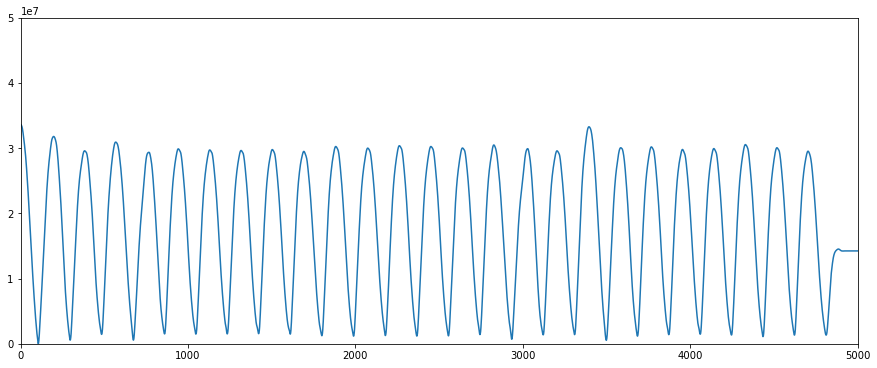

In [238]:
f, ax = plt.subplots(1, 1, figsize=(15,6))

ax.plot(mse_list)
ax.set_xlim([0, 5000])
ax.set_ylim([0, 5e7])

In [239]:
# find the starting index of matching patterns

starting_index_list = []

for i in range(0, len(total_vol)-n_points, n_points):
    section_min = np.min(mse_list[i:i+n_points])
    if section_min < 0.85e7: 
        for j in range(i, i+n_points):
            if mse_list[j] == section_min:
                starting_index_list.append(j)

In [240]:
# create an array of the repeating pattern

pattern_list = []

for i in range(len(starting_index_list)):
    starting_index = starting_index_list[i]
#     print(total_vol[starting_index:starting_index+n_points].reset_index(drop=True))
    pattern_list.append(total_vol[starting_index:starting_index+n_points].reset_index(drop=True))

# pattern_list

In [241]:
print(len(pattern_list))

2575


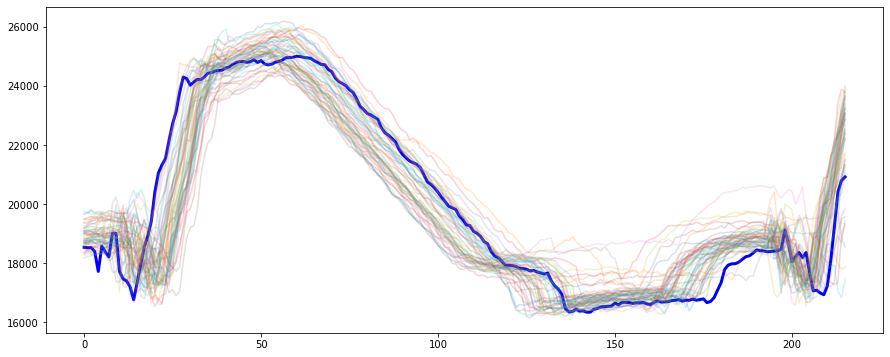

In [283]:
# plot an overlay of samples of the repeating patterns

from random import sample

sample_list = sample(range(len(pattern_list)), 50)


f, ax = plt.subplots(1, 1, figsize=(15,6))

ax.plot(example_section, color='blue', linewidth=3)

for i in range(len(sample_list)):
    ax.plot(pattern_list[sample_list[i]], alpha=0.2)



In [243]:
# save the repeating patterns to .csv

import csv

with open('pattern_list.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(pattern_list)

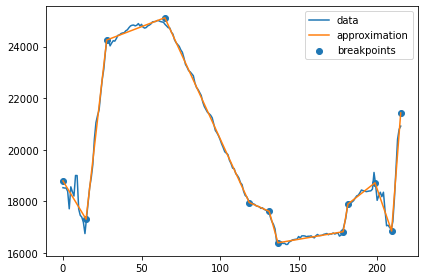

In [256]:
import numpy as np
import pwlf    # piecewise linear function approximation
import matplotlib.pyplot as plt

# Generate some dummy data.
# X = np.linspace(0, 2*np.pi, 100)
# y = np.sin(X) * X * X
X = range(n_points)
y = example_section

n_breakpoints = 11
    
pwlffit = pwlf.PiecewiseLinFit(X, y)
# Atol sets absolute tolerance, see scipy.optimize.differential_evolution.
lfx = pwlffit.fit(n_breakpoints, atol=1e-5)
lfy = pwlffit.predict(lfx)

plt.plot(X, y, label="data")
plt.plot(lfx, lfy, label="approximation")
plt.scatter(lfx, lfy, label="breakpoints")
plt.legend()
plt.tight_layout()
plt.show()

In [257]:
print(lfx)
print(lfy)

[  0.          14.70879812  27.83770863  64.84971739 118.59359349
 131.28947612 136.86101817 178.36854374 181.41827373 198.63964805
 209.21312975 215.        ]
[18797.51170041 17313.01692751 24249.95682633 25113.73289126
 17958.14364912 17617.49537463 16398.6960285  16828.97786869
 17902.50903434 18724.23871654 16854.92700345 21427.04002925]


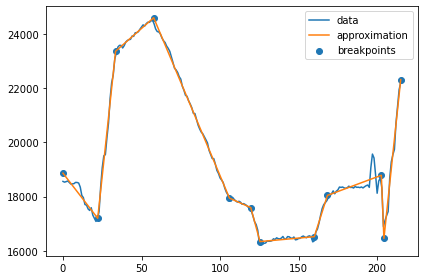

In [258]:

# Generate some dummy data.
# X = np.linspace(0, 2*np.pi, 100)
# y = np.sin(X) * X * X
X = range(n_points)
y = pattern_list[1000]
    
pwlffit = pwlf.PiecewiseLinFit(X, y)
# Atol sets absolute tolerance, see scipy.optimize.differential_evolution.
lfx = pwlffit.fit(n_breakpoints, atol=1e-5)
lfy = pwlffit.predict(lfx)

plt.plot(X, y, label="data")
plt.plot(lfx, lfy, label="approximation")
plt.scatter(lfx, lfy, label="breakpoints")
plt.legend()
plt.tight_layout()
plt.show()

In [259]:
print(lfx)
print(lfy)

[  0.          22.11662264  33.51177159  57.74882793 105.9939958
 119.56151052 125.42370208 160.         168.34660717 202.67090661
 204.30928716 215.        ]
[18867.65315333 17203.59945543 23365.65287746 24600.74965924
 17946.29209425 17596.9879772  16343.69921116 16525.1406897
 18047.12136294 18789.52739855 16457.90230825 22318.71488799]
